In [1]:
#Import necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler

In [4]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
 
# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()

In [5]:
df = pd.read_csv('../Data/Kaggle Dataset/spam_email.csv', nrows=1000)

In [6]:
'''
label
    '1' indicates that the email is classified as spam.
    '0' denotes that the email is legitimate (ham).
text
    This column contains the actual content of the email messages.
'''
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1000 non-null   int64 
 1   text    1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


<Axes: xlabel='label', ylabel='count'>

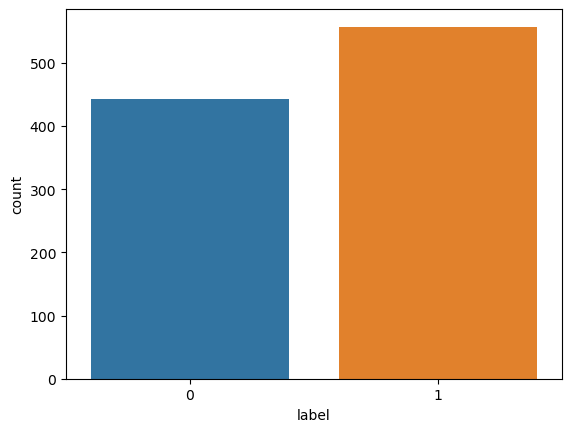

In [8]:
sns.countplot(x = df['label'])

In [9]:
df['length'] = df['text'].apply(lambda x:len(x.split(' ')))

In [10]:
df.head()

,label,text,length
0,1,ounce feather bowl hummingbird opec moment ala...,20
1,1,wulvob get your medircations online qnb ikud v...,103
2,0,computer connection from cnn com wednesday es...,339
3,1,university degree obtain a prosperous future m...,77
4,0,thanks for all your answers guys i know i shou...,223


In [11]:
y = df['label']
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
# Data Preprocessing
def text_cleaning(txt):    
    txt = txt.lower()
    txt = re.sub(r'[^a-zA-Z\s]', '', txt) 
    words = [word for word in txt.split(' ') if word not in stopwords.words("english")]
    txt = ' '.join(wnl.lemmatize(word) for word in words)
    return txt

In [13]:
df['processed'] = df['text'].apply(lambda x: text_cleaning(x))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df['processed'], y, test_size=0.2, random_state=101)

In [15]:
# Let us apply now different classification algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from datetime import datetime

In [17]:
models = {'Logistic Regression':LogisticRegression(), 
         'Support Vector Classifier':SVC(),'Decision Tree':DecisionTreeClassifier(),
         'Random Forest':RandomForestClassifier(),'Neural Network':MLPClassifier(),
         'Stochastic Gradient Descent':SGDClassifier(), 'KNN':KNeighborsClassifier()}

for model, algorithm in models.items():
    start_time = datetime.now()    
    pipe = Pipeline([('tfIdf',TfidfVectorizer()),('model', algorithm)])    
    pipe.fit(X_train ,y_train)
    end_time = datetime.now() 
    prediction = pipe.predict(X_test)
    print("\n \n ======= For {} ============".format(model))
    print('Accuracy Score : {} '.format(accuracy_score(prediction,y_test)))
    print('Confusion Matrix \n\n  ',confusion_matrix(prediction,y_test))
    print('\n Classification Report \n ')
    print(classification_report(prediction,y_test))
    time_difference = (end_time - start_time).total_seconds() * 10**3
    print("Execution time of program is: ", time_difference, "ms")


 
 ======= For Logistic Regression ============
Accuracy Score : 0.9 
Confusion Matrix 

   [[ 75   2]
 [ 18 105]]

 Classification Report 
 
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        77
           1       0.98      0.85      0.91       123

    accuracy                           0.90       200
   macro avg       0.89      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200

Execution time of program is:  209.758 ms

 
 ======= For Support Vector Classifier ============
Accuracy Score : 0.91 
Confusion Matrix 

   [[ 77   2]
 [ 16 105]]

 Classification Report 
 
              precision    recall  f1-score   support

           0       0.83      0.97      0.90        79
           1       0.98      0.87      0.92       121

    accuracy                           0.91       200
   macro avg       0.90      0.92      0.91       200
weighted avg       0.92      0.91      0.91       200

Execution t

In [ ]:
# import logging
# logging.basicConfig(level=logging.DEBUG, filename='out.log')

In [ ]:
# logging.warning('Watch out!') 
# logging.info('I told you so')
# logging.error("Error")